# 1.載入所需要的Module

In [1]:
import pandas as pd                 #製作dataframe與修改資料格式
from pandas import Series           #可能會產生Series的資料格式
import matplotlib.pyplot as plt     #繪圖
from datetime import datetime       #處理時間資料
import requests                     #爬取網址
from bs4 import BeautifulSoup       #爬取網址
from tqdm import tqdm_notebook as tqdm #出現進度條
import numpy as np                  #方便建立數列

# 2.自動爬取所有下載連結

In [2]:
for i in tqdm(range(1)):
    crime_home = "https://data.gov.tw/dataset/14200"
    head = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"}
    crime_home_O_HTML = requests.get(crime_home,headers=head)
    crime_home_M_HTML = BeautifulSoup(crime_home_O_HTML.text,"lxml")
    crime_contents = crime_home_M_HTML.select(".field-items")   #找到下載連結在HTML的位置

    #將下載連結全部存入【urlss】
    urlss = []
    for crime_content in crime_contents:
        urlss.append(crime_content.a)

    
    #將【urlss】中的【NoneType】過濾掉
    urls = filter(None,urlss)

    #將所有下載連結存入【url】
    url = []
    for u in urls:
        url.append(u.text)

    #僅保留【csv】的下載連結
    url_final = []
    for u in url:
        if("download_csv" in u):
            url_final.append(u)

    #僅保留104年~106年的資料
    del url_final[4]
    del url_final[8]
    crime_url_list =  url_final

In [3]:
crime_url_list

['https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=cbd33c7dbb4bd4833b39614893559246',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=2f0861d65100a3388f62e1bcfecba014',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=38940e0918d1e015eb3e5993f752a556',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=fcc2f6f98ae4381ff62aff9e62ad94a6',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=a40828c836192571d12f4faea9d96790',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=c31da28b393c9c1d58f947dff34491ca',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=1472daf8773f748898629863257f450a',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=5819f7055235ff44840b3aae524f35a9',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=d54e0d59b43e817446899074e76c53af',
 'https://quality.data.gov.tw/dq_download_csv.php?nid=14200&md5_url=12eb6

# 3.依據連結下載所有檔案

In [4]:
for i in tqdm(range(1)):
    #每個在【crime_url_list】中的url所對應的name
    crime_name_list = ["crime_106_4~6.txt","crime_104_4~6.txt","crime_104_10~12.txt","crime_104_7~9.txt","crime_105_1~3.txt","crime_105_4~6.txt","crime_104_1~3.txt","crime_106_10~12.txt","crime_106_7~9.txt","crime_105_7~9.txt","crime_106_1~3.txt","crime_105_10~12.txt"]


    #依據每個連結下載csv檔案，並且寫入txt檔案中
    for index,crime_url in enumerate(crime_url_list):
        url = crime_url
        crime_content_download = requests.get(url)
        crime_content = crime_content_download.content.decode("utf-8")  #將下載下來的文件解碼(文件是以utf-8編碼)
        with open(crime_name_list[index],"w",encoding="utf-8")as f:     #依照utf-8編碼寫入txt檔案中
            for row in crime_content:
                f.write(row)

    #建立新的crime name
    new_crime_name = []
    for string in crime_name_list:
        string = string.replace('~','to')
        new_crime_name.append(string[:-4])

# 4.開始修改每個txt檔案中的資料  QQ

In [5]:
#建立每個txt檔案的datafram
for index,file in enumerate(crime_name_list):
        exec("{} = pd.read_csv(file,encoding='utf-8')".format(new_crime_name[index]))

In [6]:
crime_104_1to3

,type,oc_dt,oc_p1
0,案類,發生日期,發生地點
1,住宅竊盜,1040101,台北市中山區
2,住宅竊盜,1040101,新北市永和區
3,住宅竊盜,1040101,台東縣台東市
4,住宅竊盜,1040101,台北市文山區
5,住宅竊盜,1040101,新北市三重區
6,住宅竊盜,1040101,新北市永和區
7,住宅竊盜,1040101,新北市三重區
8,住宅竊盜,1040101,新竹市北區
9,住宅竊盜,1040101,嘉義縣中埔鄉


In [7]:
#刪除某些dataframe的冗列
crime_106_10to12 = crime_106_10to12.drop(0,axis=0)
#crime_106_4to6 = crime_106_4to6.drop([0,13428],axis=0)
crime_106_7to9 = crime_106_7to9.drop([0,12521],axis=0)
crime_106_1to3 = crime_106_1to3.drop([0,12521],axis=0)
crime_105_10to12 = crime_105_10to12.drop([0,13885],axis=0)
crime_105_7to9 = crime_105_7to9.drop([0,15908],axis=0)
crime_105_4to6 = crime_105_4to6.drop([0,14687],axis=0)
crime_105_1to3 = crime_105_1to3.drop([0,12093],axis=0)
crime_104_10to12 = crime_104_10to12.drop([0,14529],axis=0)
crime_104_7to9 = crime_104_7to9.drop([0,15875],axis=0)
crime_104_4to6 = crime_104_4to6.drop([0,14650],axis=0)
crime_104_1to3 = crime_104_1to3.drop([0,13069],axis=0)

In [8]:
#建立一個大dataframe
df = pd.concat([crime_106_10to12,crime_106_7to9,crime_106_4to6,crime_106_1to3,crime_105_10to12,crime_105_7to9,crime_105_4to6,crime_105_1to3,crime_104_10to12,crime_104_7to9,crime_104_4to6,crime_104_1to3])

In [9]:
df

,type,oc_dt,oc_p1
1,住宅竊盜,1061001,台北市內湖區
2,住宅竊盜,1061001,台南市佳里區
3,住宅竊盜,1061001,花蓮縣萬榮鄉
4,住宅竊盜,1061001,台北市中正區
5,住宅竊盜,1061001,台中市豐原區
6,住宅竊盜,1061001,台南市下營區
7,住宅竊盜,1061001,桃園市桃園區
8,住宅竊盜,1061001,桃園市八德區
9,住宅竊盜,1061002,新北市鶯歌區
10,住宅竊盜,1061002,台北市萬華區


# 5.將超大df的時間形式修改為datetime

In [10]:
#修改df的column name
df.columns=["Type","Datetime","Place"]

#reset df 的 index
df = df.reset_index(drop=True)

In [11]:
#清除非datetime形式的資料
for index,d in enumerate(df.Datetime):
    d = str(d)
    if(len(d)!=7 or d.isdigit()==False):
        df = df.drop(index,axis=0)
        
#reset df 的 index
df = df.reset_index(drop=True)

In [12]:
#將datetime的民國年分改成西元年分
def applyer_year(date):
    date = str(date)
    
    if(date[0:3]=="104"):
        date = date.replace("104","2015")
    if(date[0:3]=="105"):
        date = date.replace("105","2016")
    if(date[0:3]=="106"):
        date = date.replace("106","2017")
    
    return date

df.Datetime = df.Datetime.apply(applyer_year)    

In [13]:
#在datetime中插入反斜線(將年月日區隔開來)
def applyer_slash(date):
    date = str(date)
    
    date = date[0:4]+"/"+date[4:6]+"/"+date[6:]
    
    return date

df.Datetime = df.Datetime.apply(applyer_slash)

In [14]:
#再來將datetime轉為python認可的datetime形式
df.Datetime = pd.to_datetime(df.Datetime,errors='coerce')  #'errors'的設定能在遇到不符合datetime格式資料時，將datetime的值改為'NaN'
df = df.dropna(subset=['Datetime'])  #再將NaN的row刪除

# 6.將超大df的年月日獨立成行

In [15]:
df["Year"] = df.Datetime.dt.year
df["Month"] = df.Datetime.dt.month
df["Day"] = df.Datetime.dt.day

In [16]:
df

,Type,Datetime,Place,Year,Month,Day
0,住宅竊盜,2017-10-01,台北市內湖區,2017,10,1
1,住宅竊盜,2017-10-01,台南市佳里區,2017,10,1
2,住宅竊盜,2017-10-01,花蓮縣萬榮鄉,2017,10,1
3,住宅竊盜,2017-10-01,台北市中正區,2017,10,1
4,住宅竊盜,2017-10-01,台中市豐原區,2017,10,1
5,住宅竊盜,2017-10-01,台南市下營區,2017,10,1
6,住宅竊盜,2017-10-01,桃園市桃園區,2017,10,1
7,住宅竊盜,2017-10-01,桃園市八德區,2017,10,1
8,住宅竊盜,2017-10-02,新北市鶯歌區,2017,10,2
9,住宅竊盜,2017-10-02,台北市萬華區,2017,10,2


# 7.開始瘋狂統計各項數據

## 1.每年多少人犯罪

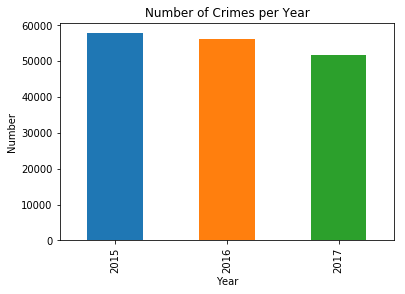

In [17]:
#以年份分組
df_year = df.groupby("Year")

#得到每年有多少人犯罪
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number")
df_year.size().plot.bar()

## 2.每月有多少人犯罪 

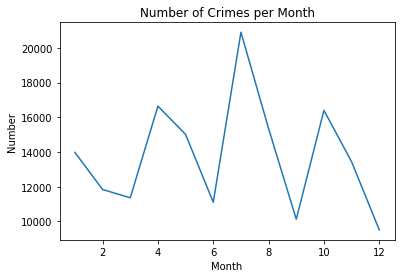

In [18]:
#以月份分組
df_month = df.groupby("Month")

#得到每月有多少人犯罪
plt.title("Number of Crimes per Month")
plt.xlabel("Month")
plt.ylabel("Number")
df_month.size().plot.line()

## 3.每月有多少人犯罪(GIF)

In [19]:
#必須做出三個年份的月份統計圖
#先將原始dataframe依照 "Year" and "Month" 進行 groupby
df_year_month = df.groupby(["Year","Month"])

#再將三個年份拆開
df_year_month_2015 = df_year_month.size()[0:12]
df_year_month_2016 = df_year_month.size()[12:24]
df_year_month_2017 = df_year_month.size()[24:36]

In [20]:
#建立x,y數列
month_index = np.arange(1,13)
number_index = np.arange(0,11000,500)

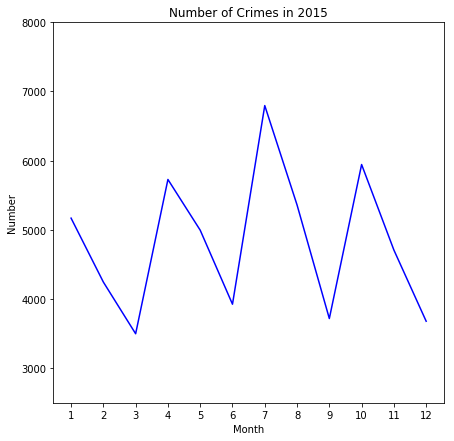

In [21]:
#接下來將這三個Series畫出來，並且儲存成3張PNG
fig_2015 = plt.figure(figsize=(7,7))

plt.xticks(month_index)
plt.ylim(2500,8000)

plt.xlabel("Month")
plt.ylabel("Number")
plt.title("Number of Crimes in 2015")

plt.plot(month_index,df_year_month_2015.values,color='blue')

plt.show()

fig_2015.savefig("fig_2015.png")

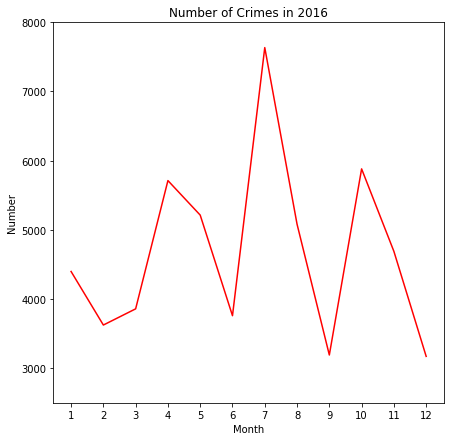

In [22]:
#接下來將這三個Series畫出來，並且儲存成3張PNG
fig_2016 = plt.figure(figsize=(7,7))

plt.xticks(month_index)
plt.ylim(2500,8000)

plt.xlabel("Month")
plt.ylabel("Number")
plt.title("Number of Crimes in 2016")

plt.plot(month_index,df_year_month_2016.values,color='red')

plt.show()

fig_2016.savefig("fig_2016.png")

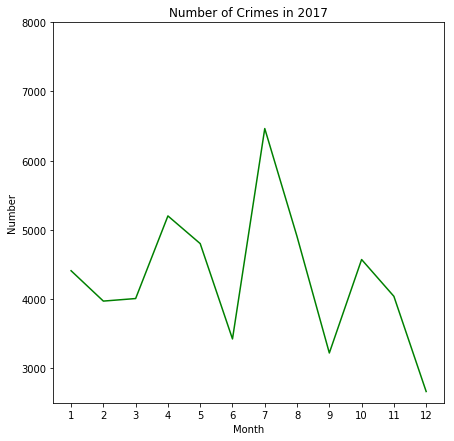

In [23]:
#接下來將這三個Series畫出來，並且儲存成3張PNG
fig_2017 = plt.figure(figsize=(7,7))

plt.xticks(month_index)
plt.ylim(2500,8000)

plt.xlabel("Month")
plt.ylabel("Number")
plt.title("Number of Crimes in 2017")

plt.plot(month_index,df_year_month_2017.values,color='green')

plt.show()

fig_2017.savefig("fig_2017.png")

In [24]:
#接下來開始操作已經存下來的3張圖片建立GIF

import imageio  #對圖片檔進行讀寫

#建立圖片名稱的list
image_names = ["fig_2015.png","fig_2016.png","fig_2017.png"] 

#將這些圖片讀取並且存入一個list(frames)中
frames = []
for image_name in image_names:
    frames.append(imageio.imread(image_name))

#再將這些圖片以GIF形式存起來
imageio.mimsave("Number of Crime per Year.gif",frames,"GIF",duration=0.7)

In [25]:
#最後要將存在電腦folder上的GIF檔案，在jupyter notebook中展現
from IPython.display import Image

#Ipython.display.Image可以根據我們所給的參數(url,filename)建立JPEG/PNG/GIF Image
Image(url='Number of Crime per Year.gif')   

## 3.每天有多少人犯罪 

In [26]:
#依照年和日進行分組
df_year_day = df.groupby(["Year","Day"])

In [27]:
#將不同年份拆開來
df_year_day_2015 = df_year_day.size()[0:31]
df_year_day_2016 = df_year_day.size()[31:62]
df_year_day_2017 = df_year_day.size()[62:93]

In [28]:
#製作x軸
x_scale = np.arange(1,32)

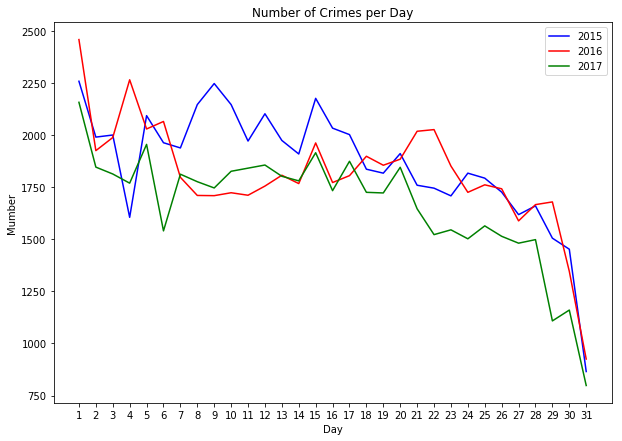

In [29]:
#開始製圖
plt.figure(figsize=(10,7))

plt.title("Number of Crimes per Day")
plt.xlabel("Day")
plt.ylabel("Mumber")

plt.xticks(x_scale)
plt.plot(df_year_day_2015.index.levels[1],df_year_day_2015.values,color="blue")
plt.plot(df_year_day_2016.index.levels[1],df_year_day_2016.values,color="red")
plt.plot(df_year_day_2017.index.levels[1],df_year_day_2017.values,color="green")

plt.legend(["2015","2016","2017"],loc="upper right")

plt.show()

## 4.每個地區犯罪程度 

In [30]:
#利用台灣地圖呈現每個縣市的犯罪嚴重程度

#首先載入geopandas(要安裝這個module真的非常困難)
import geopandas as gp

In [31]:
#接下來要讀取整個台灣的縣市界線SHP
taiwan_shp = gp.read_file("Taiwan County",encoding='utf-8') #輸入編碼方式來解決中文亂碼

taiwan_shp

,COUNTYID,COUNTYCODE,COUNTYNAME,COUNTYENG,geometry
0,Z,09007,連江縣,Lienchiang County,(POLYGON ((119.9644519140001 25.94552317400007...
1,G,10002,宜蘭縣,Yilan County,(POLYGON ((121.9597084550001 24.84493697000005...
2,N,10007,彰化縣,Changhua County,"POLYGON ((120.4565526600001 24.20718620500008,..."
3,M,10008,南投縣,Nantou County,"POLYGON ((121.2708644380001 24.23660985400005,..."
4,P,10009,雲林縣,Yunlin County,"(POLYGON ((120.081077282 23.52412216400006, 12..."
5,T,10013,屏東縣,Pingtung County,"(POLYGON ((120.379645899 22.35598933400007, 12..."
6,V,10014,臺東縣,Taitung County,(POLYGON ((121.6117956420001 21.94289657000007...
7,U,10015,花蓮縣,Hualien County,"POLYGON ((121.631747299 24.36943161600004, 121..."
8,X,10016,澎湖縣,Penghu County,(POLYGON ((119.4402533230001 23.22136844000005...
9,C,10017,基隆市,Keelung City,"(POLYGON ((121.710150286 25.17604204900005, 12..."


In [32]:
#擴增一個新的Column(County)來記錄犯罪縣市
def applyer_place(place):
    p = str(place)[:2]
    return p

df["County"] = df.Place.apply(applyer_place)

In [33]:
df

,Type,Datetime,Place,Year,Month,Day,County
0,住宅竊盜,2017-10-01,台北市內湖區,2017,10,1,台北
1,住宅竊盜,2017-10-01,台南市佳里區,2017,10,1,台南
2,住宅竊盜,2017-10-01,花蓮縣萬榮鄉,2017,10,1,花蓮
3,住宅竊盜,2017-10-01,台北市中正區,2017,10,1,台北
4,住宅竊盜,2017-10-01,台中市豐原區,2017,10,1,台中
5,住宅竊盜,2017-10-01,台南市下營區,2017,10,1,台南
6,住宅竊盜,2017-10-01,桃園市桃園區,2017,10,1,桃園
7,住宅竊盜,2017-10-01,桃園市八德區,2017,10,1,桃園
8,住宅竊盜,2017-10-02,新北市鶯歌區,2017,10,2,新北
9,住宅竊盜,2017-10-02,台北市萬華區,2017,10,2,台北


In [34]:
#依照County進行groupby
df_county = df.groupby("County")

In [35]:
df_county.size()

County
na        1
南投     3833
台中    14394
台北    15819
台南    11025
台東     1161
台灣        1
嘉義     4110
基隆     4711
外國        5
宜蘭     3192
屏東     6647
彰化     6080
新北    32773
新竹     7792
桃園    24957
澎湖      219
花蓮     2673
苗栗     3425
連江       27
金門      244
雲林     4272
高雄    18287
dtype: int64

In [36]:
#必須將每個縣市犯罪的數量填入taiwan_shp的value column中
taiwan_shp["value"] = [27,3192,6080,3833,4272,6647,1161,2673,219,4711,7792,15819,32773,14394,11025,24957,3425,7792,4110,4110,18287,244]

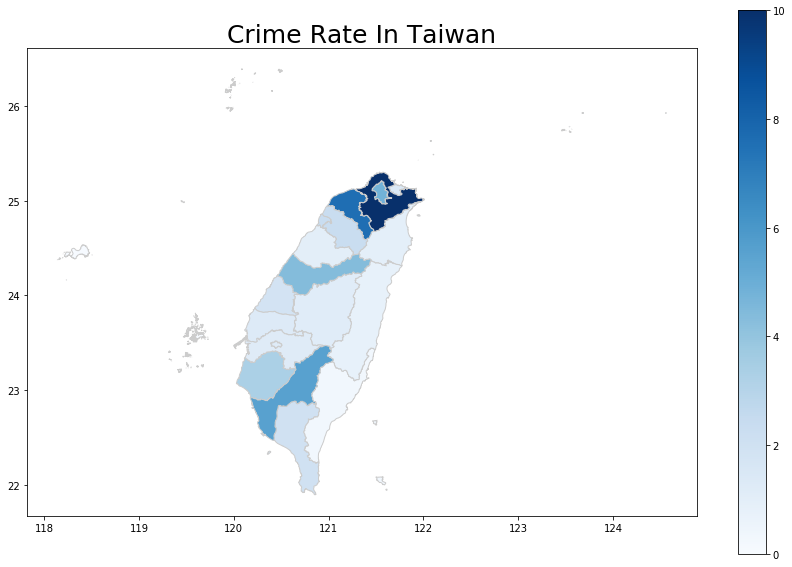

In [37]:
#藉由subplot呈現台灣地圖
#因為這個subplot只有1個ax，則此ax相當於整個fig
fig, ax = plt.subplots(1, figsize=(15, 10))

#調整ax裡面的title的字體大小與粗細
ax.set_title("Crime Rate In Taiwan",fontdict={"fontsize":"25","fontweight":"3"})

#plt.cm.ScalarMappable是用來設定colorbar的屬性(顏色、範圍)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=10))
sm.set_array([])
fig.colorbar(sm)

#shp檔案.plot 能夠直接畫出地圖
taiwan_shp.plot(column='value', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.8')